# <span style="color:blue"> MBA em Ciência de Dados</span>
# <span style="color:blue">Técnicas Avançadas de Captura e Tratamento de Dados</span>

## <span style="color:blue">Avaliação Final</span>
**Luis Gustavo Nonato** e **Moacir Antonelli Ponti**<br>

**Cemeai - ICMC/USP São Carlos**

In [1]:
#Importando as bibliotecas
import pandas as pd
import numpy as np

from PIL import Image 
import pytesseract as ocr
import sys 
from pdf2image import convert_from_path 
import os 
from PIL import Image
import glob  


# import pdftotext

In [2]:
## Extraindo o Zip
import zipfile
def main(nome):
    with zipfile.ZipFile(nome, 'r') as file:
#         print(file.printdir())
        print('Extraindo os arquivos...')
        file.extractall()
        print('Finalizado!') 
if __name__ == '__main__': main('paintings.zip')

Extraindo os arquivos...
Finalizado!


A avaliação vale 10 pontos. As questões de 1 a 4, caso respondidas da forma correta, já totalizam 10 pontos.


<font color='red'>**ATENÇÃO:** Quando terminar o exame, você deve fazer um "upload" do notebook no _moodle_</font>.

### Questão 1 (2.5 pontos)
Considere o arquivo <font style="font-family: monaco"> modcovid.pdf </font> (disponível para download no moodle). Escreva um código para extrair o texto (ASCII) do arquivo PDF e escreva o texto extraído em um arquivo chamado ``modcovid.txt``.


In [3]:
import os
import glob

#Usando função para gerar o diretório em que salvaremos as imagens geradas de cada página do pdf
def create_image_dir(filename):
    name = filename.split('.')[0]
    dir_name = name+'_imagens'
    if not os.path.exists(dir_name):  # verificando se o diretorio existe
        os.makedirs(dir_name)      
    else:
        files = glob.glob(dir_name+'/*') # removendo arquivos do
        for f in files:                  # diretorio caso ele já exista
            os.remove(f)
            
    return(dir_name)
    
create_image_dir('modcovid.pdf')

'modcovid_imagens'

In [4]:
# Gerando figuras das páginas do pdf na pasta criada anterioremente

filename = 'modcovid.pdf'
diretorio = create_image_dir(filename)

imagem_paginas = convert_from_path(filename)

for i,pagina in enumerate(imagem_paginas): 
    image_name = diretorio + "/pagina_"+str(i)+".png"  # nome do arquivo da imagem
      
    # Salavando a imagen da página em um arquivo
    print('Gravando pagina: ',image_name)
    pagina.save(image_name, 'PNG') 

Gravando pagina:  modcovid_imagens/pagina_0.png


In [5]:
# utilizando OCR para extrair o texto das imagens das paginas do aquivo

files = glob.glob("modcovid_imagens/pagina_0.png")

texto = []
for filename in files:
    t = ocr.image_to_string(Image.open(filename), lang='por')
    texto.append(t)
    print(t)
    
# for i,t in enumerate(texto):
#     print(5*'**','Texto da pagina ',i,5*'**','\n')
#     print(texto[i])

TesseractNotFoundError: tesseract is not installed or it's not in your PATH

In [8]:
!pip install unidecode

### Questão 2 (2.5 pontos)
Leia o arquivo ``modcovid.txt`` e realize as seguinte operações:
1. Extraia todas palavras contidas no arquivo e armazene em uma lista de palavras (utilize o método <font color='blue'>word_tokenize</font> do pacote <font color='blue'>nltk</font>.
2. Remova da lista de palavras todos os "palavras" que não sejam formadas exclusivamente de caracteres do alfabeto.
3. Quantas palavras com apenas 1 caractere sobraram na lista?

In [9]:
import nltk
import string
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from unidecode import unidecode

In [10]:
with open('modcovid.txt', 'r', encoding="utf8") as f2:
    data = f2.read()
#     data = unidecode(data)
    print(data)

Ferramenta matemática ajuda a planejar isolamento intermitente em SP
Modelo aponta momentos em que cada cidade poderia ter mais ou menos restrições
Medidas de controle são fundamentais para resguardar o sistema de saúde diante da
pandemia de Covid-19. O protocolo de distanciamento social têm sido adotado na maior parte
dos países e também no Brasil. Pesquisadores unem esforços e utilizam a matemática para
estudar algumas questões: Por quanto tempo o protocolo deve ser mantido para se evitar o
colapso do sistema de saúde? Cientes de que a evolução da doença não se encontra no mesmo
estágio em todas as cidades e que a capacidade hospitalar varia muito em cada região, deve-se
implantar o mesmo protocolo de distanciamento de forma homogênea em todas cidades e no
mesmo momento? Deve-se amenizar o protocolo também de forma homogênea em todo o
estado?
O grupo denominado ModCovid19, formado por uma parceria entre pesquisadores do
Instituto de Ciências Matemáticas e de Computação, da USP São Ca

***1. Extraia todas palavras contidas no arquivo e armazene em uma lista de palavras (utilize o método word_tokenize do pacote nltk.***

In [11]:
# Tokenizando o texto
words = nltk.word_tokenize(data)

***2. Remova da lista de palavras todos os "palavras" que não sejam formadas exclusivamente de caracteres do alfabeto.***

In [12]:
# removendo simbolos da lista de palavras
words = [w.lower() for w in words if w.isalpha() and w not in string.ascii_letters]
# pd.DataFrame(words).head(5)
# words

***3. Quantas palavras com apenas 1 caractere sobraram na lista?***

In [13]:
somente_1_caractere=[w.lower() for w in words if w.isalpha() and len(w) ==1]
print("Sobraram %s ´palavras´ com apenas 1 caractere"  %len(somente_1_caractere))

#Se tivéssemos excluidos a acentuação, o processo de toekização não teria deixado nenhuma.
words1 = nltk.word_tokenize(unidecode(data))
words1 = [w.lower() for w in words1 if w.isalpha() and w not in string.ascii_letters]
somente_1_caractere=[w.lower() for w in words1 if w.isalpha() and len(w) ==1]
print("Sobraram %s ´palavras´ com apenas 1 caractere"  %len(somente_1_caractere))
# Pegando aquelas com tamanho maior que 1
# words = [w.lower() for w in words if w.isalpha() and len(w) >=2]

Sobraram 3 ´palavras´ com apenas 1 caractere
Sobraram 0 ´palavras´ com apenas 1 caractere


<font color='red'> **Conclusão da questão "3":** </font>  Sobram apenas 3 palavras com 1 caractere. Se tivéssemos excluido acentuações, não teríamos nenhuma

### Questão 3 (2.5 pontos)

Antes de começar, carregue o arquivo `artists.csv` e armazene em um pandas DataFrame.


In [14]:
df = pd.read_csv("artists_mba.csv")
df.head(5)

,name,years,genre,nationality,bio,wikipedia,paintings
0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194


In [15]:
# Mais a frente vi que teremos que trabalhar com a variável nacionality. Portanto, estou tratando ela de tal forma a remover
# possívels espaços em branco e colocar el lowercase e retirando acentos
df['nationality']=df.nationality.str.strip().str.lower()
df['nationality'] = df['nationality'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df.head(2)

,name,years,genre,nationality,bio,wikipedia,paintings
0,Amedeo Modigliani,1884 - 1920,Expressionism,italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88


In [16]:
# Avaliando se temos alguma coluna missing
df.isnull().sum()

name           0
years          0
genre          0
nationality    0
bio            0
wikipedia      0
paintings      0
dtype: int64

In [17]:
#Avaliando se temos duplicidades
df_nd = df.drop_duplicates(keep='first')
print("Antes: %d, Depois: %d" % (df.shape[0], df_nd.shape[0]))

Antes: 53, Depois: 53


#### a) (0.5 pontos)

Crie um novo atributo no dataframe, chamado `birth`, pegando os 4 primeiros caracteres do atributo `years` e convertendo para inteiro.

Posteriormente, exiba o tipo do novo atributo e a estatística descritiva do novo atributo linhas usando a função `describe()`

In [18]:
df['birth']=df.years.str.slice(start=0, stop=4).astype('int64')
print("Valores da variável birth :\n",df['birth'].unique())
print("\nTamanho da base: ",df.shape)
# print("Tipo da variáel Birth:", df['years'].dtypes)

Valores da variável birth :
 [1884 1866 1886 1840 1898 1904 1832 1360 1853 1862 1450 1879 1856 1881
 1577 1841 1746 1907 1541 1471 1839 1525 1887 1266 1445 1571 1452 1599
 1869 1395 1834 1606 1488 1864 1819 1830 1775 1863 1798 1844 1859 1872
 1893 1928 1848 1483 1475 1912 1100 1903 1762]

Tamanho da base:  (53, 8)


In [19]:
print("Tipo da variáel Birth:", df['birth'].dtypes)

Tipo da variáel Birth: int64


In [20]:
print("Descritiva da variáel Birth:\n")
pd.DataFrame(df.birth.describe())

Descritiva da variáel Birth:



,birth
count,53.000000
mean,1729.358491
std,203.256573
min,1100.000000
25%,1571.000000
50%,1839.000000
75%,1872.000000
max,1928.000000


#### b) (1 ponto)

Execute uma função que identifique outliers com base no intervalo interquartil.
Mostre as linhas referentes a outliers detectados por esse método no atributo `paintings` para valores para além de mais ou menos $2 \times IQR$.

In [21]:
def remove_outliers_IQR(df, attributes,qtd_iqr):
    
    dfn = df.copy()
    
    for var in attributes:
        # verifica se variável é numerica
        if np.issubdtype(df[var].dtype, np.number):
            Q1 = dfn[var].quantile(0.25)
            Q2 = dfn[var].quantile(0.50)
            Q3 = dfn[var].quantile(0.75)
            IQR = Q3 - Q1
            
            # apenas outliers segundo IQR
            base_excluida = dfn.loc[(df[var] < Q1-(IQR*qtd_iqr)) | (df[var] > Q3+(IQR*qtd_iqr)),:]
            
            # apenas inliers segundo IQR
            dfn = dfn.loc[(df[var] >= Q1-(IQR*qtd_iqr)) & (df[var] <= Q3+(IQR*qtd_iqr)),:]
            
    return dfn, base_excluida

In [22]:
attributes = ['paintings']
df_out,base_excluida = remove_outliers_IQR(df, attributes,2)
print("Antes: %d, Depois: %d" % (df.shape[0], df_out.shape[0]))

Antes: 53, Depois: 49


In [23]:
print("Indice dos registros excluidos por serem classificados como outliers :", base_excluida.index.tolist())
print("Abaixo, os registros excluidos:")
base_excluida

Indice dos registros excluidos por serem classificados como outliers : [8, 13, 30, 51]
Abaixo, os registros excluidos:


,name,years,genre,nationality,bio,wikipedia,paintings,birth
8,Vincent van Gogh,1853 – 1890,Post-Impressionism,dutch,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,http://en.wikipedia.org/wiki/Vincent_van_Gogh,877,1853
13,Pablo Picasso,1881 - 1973,Cubism,spanish,Pablo Ruiz Picasso (; Spanish: [ˈpaβlo piˈkaso...,http://en.wikipedia.org/wiki/Pablo_Picasso,439,1881
30,Edgar Degas,1834 - 1917,Impressionism,french,Edgar Degas (US: or UK: ; born Hilaire-Germai...,http://en.wikipedia.org/wiki/Edgar_Degas,702,1834
51,Candido Portinari,1903 – 1962,Neorealism,brazilian,"Candido Portinari (December 29, 1903 – Februar...",https://en.wikipedia.org/wiki/Candido_Portinari,4920,1903


#### c) (1 ponto)

Crie um novo atributo numérico, codificando em inteiros o atributo `nationality`. Posteriormente, compute a correlação de Pearson entre esse novo atributo e o atributo `paintings`

In [24]:
#Testei algumas formas diferentes de fazer para aprendizado
df_out['nacionalidade_codificada_metodo1'] = pd.factorize(df_out['nationality'])[0] + 1
df_out["nacionalidade_codificada_metodo2"] = pd.Categorical(df_out.nationality).codes
df_out["nacionalidade_codificada_metodo3"] = df_out['nationality'].astype("category").cat.codes


print("Validação. Antes: \n",df_out['nationality'].value_counts())
print("Validação. Depois: \n",df_out['nacionalidade_codificada_metodo1'].value_counts())
print("Validação. Depois: \n",df_out['nacionalidade_codificada_metodo2'].value_counts())
print("Validação. Depois: \n",df_out['nacionalidade_codificada_metodo3'].value_counts())

df["nacionalidade_codificada_metodo3"] = df['nationality'].astype("category").cat.codes

Validação. Antes: 
 french                      12
italian                      8
spanish                      5
russian                      4
flemish                      3
dutch                        3
mexican                      2
american                     2
french,british               1
french,jewish,belarusian     1
belgian                      1
british                      1
german                       1
spanish,greek                1
norwegian                    1
brazilian                    1
austrian                     1
german,swiss                 1
Name: nationality, dtype: int64
Validação. Depois: 
 4     12
1      8
6      5
2      4
8      3
9      3
17     2
3      2
12     1
11     1
10     1
13     1
7      1
14     1
5      1
15     1
16     1
18     1
Name: nacionalidade_codificada_metodo1, dtype: int64
Validação. Depois: 
 7     12
12     8
16     5
15     4
5      3
6      3
0      2
13     2
1      1
2      1
3      1
4      1
17     1
9      1
10     

In [25]:
df_out.dtypes

name                                object
years                               object
genre                               object
nationality                         object
bio                                 object
wikipedia                           object
paintings                            int64
birth                                int64
nacionalidade_codificada_metodo1     int64
nacionalidade_codificada_metodo2      int8
nacionalidade_codificada_metodo3      int8
dtype: object

In [26]:
countries = df.nationality.unique()
countries

array(['italian', 'russian', 'mexican', 'french', 'belgian', 'spanish',
       'dutch', 'austrian', 'flemish', 'spanish,greek', 'german',
       'french,british', 'french,jewish,belarusian', 'british',
       'norwegian', 'german,swiss', 'american', 'brazilian'], dtype=object)

In [27]:
df_out['palavras']=df_out['nationality'].str.count(',') + 1

# #Eu percbi que tem algumas nacionalidades que estão com mais de 1 informação separadas por vírgula. Não me parece fazer muito
# sentido isso. Dei uma olhada no link da wikipedia e por exempplo a nacionalidade do El Grego é Grega. Ele foi um pintor 
# de nacionalidade Grega que tem relacão com o Renascimento Espanhol. Nesse caso, poderíamos entender estas linhas como com 
# problema e retirá-las da base. Contudo, como o exercício não faz menção sobre limpar a base de dados (em nenhuma questão anterior)
# estou deixando para realizar os cálculos de correlação. Para retirar estas linhas, bastaria eliminar todas aquelas que a coluna
# palavras é maior ou igual a 2, usando o seguinte código (em que deixo em uma base separadas os filtrados e na outra a base limpa)

# print("Base original: ",df_out.shape)
# df_out_filtrada = df_out[df_out['palavras'] >= 2] 
# df_out= df_out[df_out['palavras'] <= 1] 
# print("Somente Excluidos: ",df_out_filtrada.shape)
# print("Base Final: ",df_out.shape)
df_out.head(2)


,name,years,genre,nationality,bio,wikipedia,paintings,birth,nacionalidade_codificada_metodo1,nacionalidade_codificada_metodo2,nacionalidade_codificada_metodo3,palavras
0,Amedeo Modigliani,1884 - 1920,Expressionism,italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193,1884,1,12,12,1
1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88,1866,2,15,15,1


***Calculando a correlação de person***

Na questão anterior, não é comentado para que se exclua, mas apenas se identifique os outliers. Dessa forma, calculei a correlação entre as variáveis das duas maneiras, sendo a primeira, com a base limpa dos outliers e na segunda com a base completa. Do meu ponto de vista, o ideal seria fazermos a análise sem os outliers.

In [28]:
print('Correlação de Person ´Metodo 3´ na base limpa dos outliers:')
df_out[['paintings', 'nacionalidade_codificada_metodo3']].corr()



Correlação de Person ´Metodo 3´ na base limpa dos outliers:


,paintings,nacionalidade_codificada_metodo3
paintings,1.000000,0.017205
nacionalidade_codificada_metodo3,0.017205,1.000000


In [29]:
print('Correlação de Person ´Metodo 3´ na base completa')
df[['paintings', 'nacionalidade_codificada_metodo3']].corr()

Correlação de Person ´Metodo 3´ na base completa


,paintings,nacionalidade_codificada_metodo3
paintings,1.000000,-0.193837
nacionalidade_codificada_metodo3,-0.193837,1.000000


***Conclusão:*** Do meu ponto de vista não faz sentido avaliarmos a correlação de person com entre nacionalidade e a quantidade de pinturas. 
Para mim, se queremos avaliar a relação entre nacionalidade e paintings, deveríamos usar outra métrica ou fazermos 
testes de hipótese buscando por exemplo avaliar se o valor de painting é igual para todas as nacionalidades

### Questão 4 (2.5 pontos)

Dada uma imagem `painting.jpg` de uma pintura da qual não sabemos o artista, gostaríamos de fazer uma busca numa base de dados e recuperar obras similares. Para isso utilizaremos uma composição de descritores:
1. Histograma de cores (R, G, B) considerando 4 bins por canal de cor (total 12 características)
2. Descritor LBP utilizando raio 2.5 e 16 pontos (total 18 características).

Concatene esses dois descritores e use-o como descritor de cor e textura da imagem. Faça uma busca no diretório `paintings`, retornando as 5 imagens mais similares de acordo com esse descritor e a distância Euclidiana. Exiba a imagem de consulta e também as 5 imagens retornadas, com seus nomes e valor da distância obtido.

***inclua os pacotes necessários e as funções necessárias***

In [30]:
import pandas as pd
import numpy as np
import imageio
import os
import glob
import matplotlib.pyplot as plt

# Função para cálculo da distância Euclidiana
def euclidean_distance(A, B):
    return  np.sqrt( np.sum((A-B)**2) )

# Função LBP --> Parâmetros já colocados como default os valores solicitados na questão
from skimage import feature
def lbp_features(img, points=16, radius=2.5, n_bins=18):
    # LBP opera em imagens de um só canal, aqui vamos converter 
    # RGB para escala de cinza usando o método Luminance
    img = np.array(img, dtype=np.float64, copy=False)
    if (len(img.shape) > 2):
        img = img[:,:,0]*0.3 + img[:,:,1]*0.59 + img[:,:,2]*0.11
    
    # normaliza a imagem para ter máximo = 255
    if (np.max(img) > 0):
        img = ((img/np.max(img))*255).astype(np.uint8)
    
    # aqui definimos o numero de pontos e o raio, padrao = 8, 1
    lbp = feature.local_binary_pattern(img.astype(np.uint8), points, radius, method="uniform")
    
    # lbp retorna um matriz com os códigos, então devemos extraír o histograma
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_bins+1), range=(0, n_bins))

    # normaliza o histograma
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    # return the histogram of Local Binary Patterns

    return hist


# Função para criação do histograma de cores --> Parâmetros já colocados como default os valores solicitados na questão
def histograma_global(img, bins=4):

    # um único canal de cor
    if (len(img.shape) == 2):
        hist,_ = np.histogram(img, bins=bins)
    # mais do que um canal de cor RGB
    if (len(img.shape) == 3):
        hist_R,_ = np.histogram(img[:,:,0], bins=bins)
        hist_G,_ = np.histogram(img[:,:,1], bins=bins)
        hist_B,_ = np.histogram(img[:,:,2], bins=bins)
        
        hist = np.concatenate([hist_R, hist_G, hist_B])
    
    # normaliza o vetor resultante pela soma dos valores
    hist = hist.astype("float")
    hist /= (hist.sum() + 0.0001)        
    
    return hist

***Inclua o código para carregar as imagens, gerar os vetores de características e obter as distâncias***

In [31]:
imagem = 'paintings\\painting.jpg'
fotos = glob.glob('paintings/*')
listagem = os.listdir('paintings/')
number_files = len(listagem)
print("Número de arquivos no diretório: %i imagens" %number_files)

Número de arquivos no diretório: 61 imagens


In [32]:
imagem

'paintings\\painting.jpg'

In [33]:
fotos[0:3]

['paintings\\Caravaggio_1.jpg',
 'paintings\\Caravaggio_10.jpg',
 'paintings\\Caravaggio_2.jpg']

In [34]:
# pegando todas as imagens do diretório paintings e alocando em um único arquivo com todas
comparacao = list()
listagem_nomes= list()
# img_base = None
for i in fotos:
    if i != imagem:
        comparacao.append(imageio.imread(i) )
#         print(comparacao)
        listagem_nomes.append(i)
    else:
        img_base = imageio.imread(imagem)

In [35]:
#validando se foram lidas todas as imagens
len(comparacao)
# comparacao

60

In [36]:
print("Histograma da imagem a ser comparada\n", histograma_global(img_base))
print("\nLBP da imagem a ser comparada\n", lbp_features(img_base))

Histograma da imagem a ser comparada
 [0.09249876 0.02100064 0.05056299 0.16927094 0.12727675 0.02202394
 0.03271723 0.15131542 0.12421217 0.01939487 0.03311203 0.15661426]

LBP da imagem a ser comparada
 [0.08084236 0.05359571 0.02028362 0.01311876 0.01136074 0.01183344
 0.01418632 0.02190886 0.03056087 0.02436265 0.01452624 0.0161143
 0.01349055 0.01921606 0.02686956 0.04143828 0.12435203 0.46193966]


In [37]:
#Validando se a informação está vindo no formato correto na lista comparação
print("Histograma da PRIMEIRA imagem a ser comparada\n", histograma_global(comparacao[0]))
print("\nLBP da PRIMEIRA imagem a ser comparada\n", lbp_features(comparacao[0]))

Histograma da PRIMEIRA imagem a ser comparada
 [0.21791834 0.09700268 0.01388487 0.00452744 0.25167738 0.0755502
 0.00506961 0.00103614 0.19003614 0.13872557 0.00430522 0.0002664 ]

LBP da PRIMEIRA imagem a ser comparada
 [0.07486345 0.05054618 0.03487952 0.02045382 0.01507229 0.01450201
 0.01554618 0.02067871 0.02680723 0.01912048 0.01324096 0.01316466
 0.01377108 0.01886747 0.03222088 0.05215663 0.08743373 0.4766747 ]


In [38]:
distancias = list()
nomes = list()
# Concatenate and compute euclidean distance
for i in comparacao:
    distancias.append(euclidean_distance(np.concatenate([histograma_global(img_base),lbp_features(img_base)]),
                                         np.concatenate([ histograma_global(i),lbp_features(i)])))
    
Base_Distancias = pd.DataFrame(distancias).rename(columns={0: "Distancia Euclidiana"})
Base_Distancias['Nomes'] = pd.DataFrame(listagem_nomes)

In [39]:
Base_Distancias.sort_values(by=["Distancia Euclidiana"]).head(5)

,Distancia Euclidiana,Nomes
39,0.150038,paintings\Joan_Miro_9.jpg
33,0.159100,paintings\Joan_Miro_3.jpg
56,0.174797,paintings\William_Turner_6.jpg
27,0.214339,paintings\Frida_Kahlo_7.jpg
5,0.223694,paintings\Caravaggio_5.jpg


***inclua o código para obter as 5 imagens mais próximas com base nas distâncias computadas e exibi-las***

Text(0.5, 1.0, "Rank 1 igual a 0.2237 do arquivo: ['paintings\\\\Caravaggio_5.jpg']")

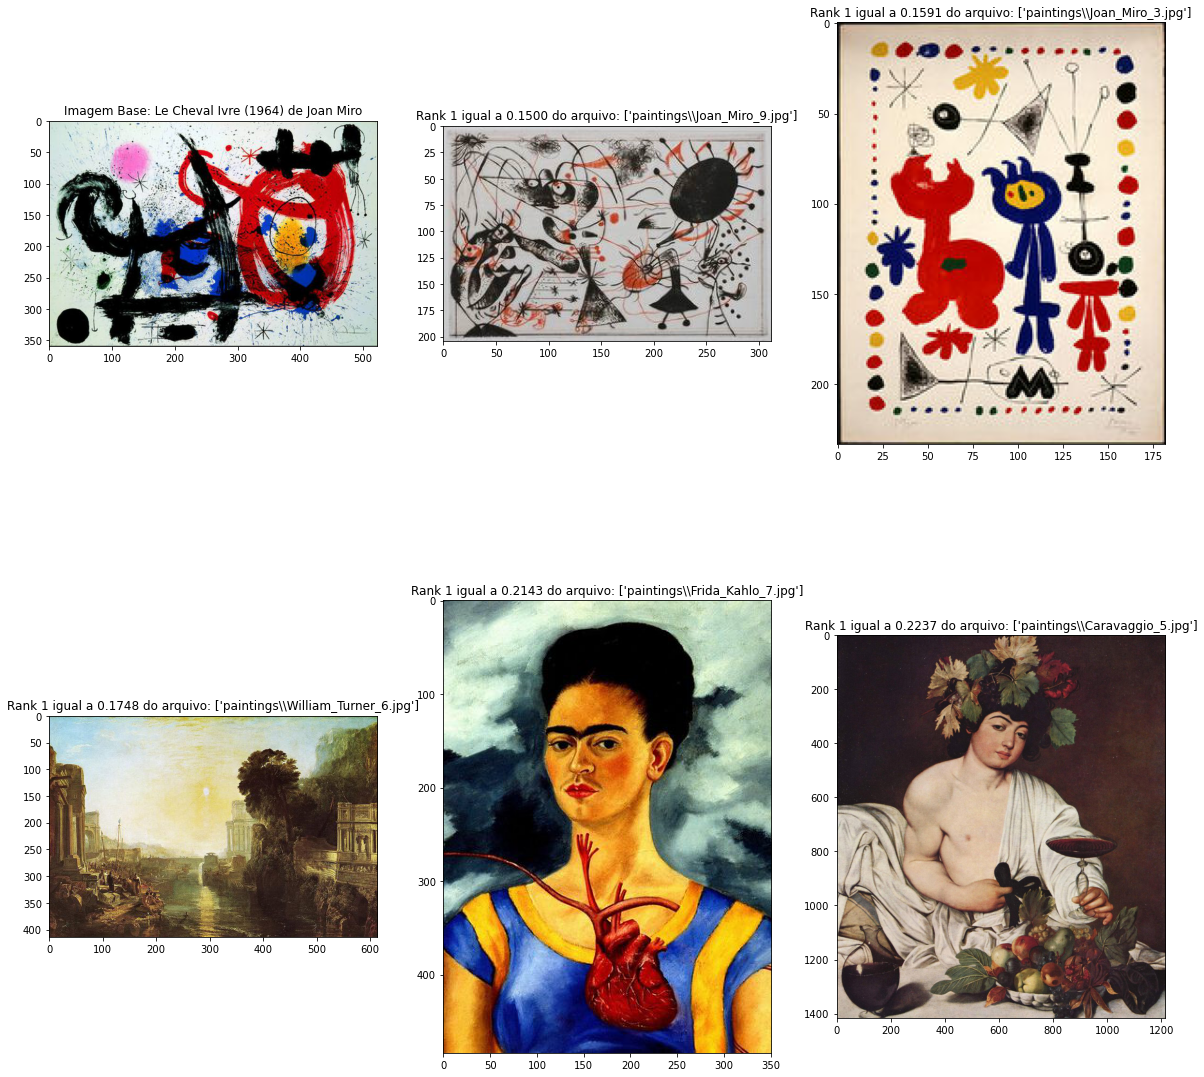

In [40]:
# Imprimindo as 5 imagens com menor distância euclidiana. NO titulo, temos o valor da distância e o nome do arquivo.
#Buscando no google imagens, foi possível validar que a imagem base é de Joan Miro
plt.figure(figsize=(20,20))
plt.subplot(231); plt.imshow( img_base ); plt.title('Imagem Base: Le Cheval Ivre (1964) de Joan Miro')
plt.subplot(232); plt.imshow( comparacao[39] ); plt.title('Rank 1 igual a %.4f do arquivo: %s' %(Base_Distancias.iloc[[39], [0]].values[0].astype(float),Base_Distancias.iloc[[39], [1]].values[0].astype(str)))
plt.subplot(233); plt.imshow( comparacao[33] ); plt.title('Rank 1 igual a %.4f do arquivo: %s' %(Base_Distancias.iloc[[33], [0]].values[0].astype(float),Base_Distancias.iloc[[33], [1]].values[0].astype(str)))
plt.subplot(234); plt.imshow( comparacao[56] ); plt.title('Rank 1 igual a %.4f do arquivo: %s' %(Base_Distancias.iloc[[56], [0]].values[0].astype(float),Base_Distancias.iloc[[56], [1]].values[0].astype(str)))
plt.subplot(235); plt.imshow( comparacao[27] ); plt.title('Rank 1 igual a %.4f do arquivo: %s' %(Base_Distancias.iloc[[27], [0]].values[0].astype(float),Base_Distancias.iloc[[27], [1]].values[0].astype(str)))
plt.subplot(236); plt.imshow( comparacao[5] ); plt.title('Rank 1 igual a %.4f do arquivo: %s' %(Base_Distancias.iloc[[5], [0]].values[0].astype(float),Base_Distancias.iloc[[5], [1]].values[0].astype(str)))
